## Problem Statement

List and describe some other interesting features of this data set.

In [128]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [129]:
totWords = 2309
charRank = {'a': 906, 'b': 266, 'c': 446, 'd': 370, 'e': 1053, 'f': 206, 'g': 299, 'h': 377, 'i': 646, \
            'j': 27, 'k': 202, 'l': 645, 'm': 298, 'n': 548, 'o': 672, 'p': 345, 'q': 29, 'r': 835, \
            's': 617, 't': 667, 'u': 456, 'v': 148, 'w': 193, 'x': 37, 'y': 416, 'z': 35}
charRankByPos = [{'a': 140, 'b': 173, 'c': 198, 'd': 111, 'e': 72, 'f': 135, 'g': 115, 'h': 69, \
                  'i': 34, 'j': 20, 'k': 20, 'l': 87, 'm': 107, 'n': 37, 'o': 41, 'p': 141, 'q': 23, \
                  'r': 105, 's': 365, 't': 149, 'u': 33, 'v': 43, 'w': 82, 'y': 6, 'z': 3}, \
                 {'a': 304, 'b': 16, 'c': 40, 'd': 20, 'e': 241, 'f': 8, 'g': 11, 'h': 144, 'i': 201, 'j': 2, \
                  'k': 10, 'l': 200, 'm': 38, 'n': 87, 'o': 279, 'p': 61, 'q': 5, 'r': 267, 's': 16, 't': 77, \
                  'u': 185, 'v': 15, 'w': 44, 'x': 14, 'y': 22, 'z': 2}, {'a': 306, 'b': 56, 'c': 56, 'd': 75, \
                  'e': 177, 'f': 25, 'g': 67, 'h': 9, 'i': 266, 'j': 3, 'k': 12, 'l': 112, 'm': 61, 'n': 137, 'o': 243, \
                  'p': 57, 'q': 1, 'r': 163, 's': 80, 't': 111, 'u': 165, 'v': 49, 'w': 26, 'x': 12, 'y': 29, 'z': 11}, \
                 {'a': 162, 'b': 24, 'c': 150, 'd': 69, 'e': 318, 'f': 35, 'g': 76, 'h': 28, 'i': 158, 'j': 2, \
                  'k': 55, 'l': 162, 'm': 68, 'n': 182, 'o': 132, 'p': 50, 'r': 150, 's': 171, 't': 139, 'u': 82, \
                  'v': 45, 'w': 25, 'x': 3, 'y': 3, 'z': 20}, {'a': 63, 'b': 11, 'c': 31, 'd': 118, 'e': 422, 'f': 26, \
                  'g': 41, 'h': 137, 'i': 11, 'k': 113, 'l': 155, 'm': 42, 'n': 130, 'o': 58, 'p': 56, 'r': 212, 's': 36, \
                  't': 253, 'u': 1, 'w': 17, 'x': 8, 'y': 364, 'z': 4}]

def charCount(s):
    dic = {}
    for ch in s:
        try:
            dic[ch] += 1
        except KeyError:
            dic[ch] = 1
    return dic

def calc_roc(s): 
    dic = charCount(s)
    l = [val for val in dic.values()]
    return stats.entropy(l)

def calc_pov(s):
    I2 = 0
    for c in s:
        if c in ["a", "e", "i", "o", "u"]: I2 += 1
    return I2 / 5

def calc_rank():
    with open("./dataset/wordle_wordbank.txt") as f:
        lines = f.readlines()
    print(len(lines))
    lines = [s.strip() for s in lines]
    dic = {}
    dic2 = [{} for _ in range(5)]
    for s in lines:
        for c in set(s.lower()):
            try: dic[c] += 1
            except KeyError: dic[c] = 1
        for i, c in enumerate(s):
            try: dic2[i][c] += 1
            except KeyError: dic2[i][c] = 1
    return dict(sorted(dic.items())), [dict(sorted(dic2[i].items())) for i in range(5)]

def calc_EYH(s):
    I3 = 0
    for c in set(s):
        I3 += charRank[c] / totWords
    return I3

# I3G is expectation of green hits
def calc_EGH(s):
    I3 = 0
    for i, c in enumerate(s):
        I3 += charRankByPos[i][c] / totWords
    return I3

Read the word difficulty classification data and break down words into characters.

In [130]:
df = pd.read_excel("./dataset/difficulty_classification.xlsx", index_col=0, usecols="A,B,C")
df["ROC"] = [calc_roc(word) for word in df["word"]]
df["EYH"] = [calc_EYH(word) for word in df["word"]]
df["EGH"] = [calc_EGH(word) for word in df["word"]]
difficulty = []
for clus_num in df["class"]:
    if clus_num == 0: difficulty.append(3)
    elif clus_num == 1: difficulty.append(2)
    elif clus_num == 2: difficulty.append(4)
    elif clus_num == 3: difficulty.append(5)
    elif clus_num == 4: difficulty.append(1)
    elif clus_num == 5: difficulty.append(6)
    elif clus_num == 6: difficulty.append(0)
df["difficulty"] = difficulty
del df["word"], df["class"]

Plot the relationships.

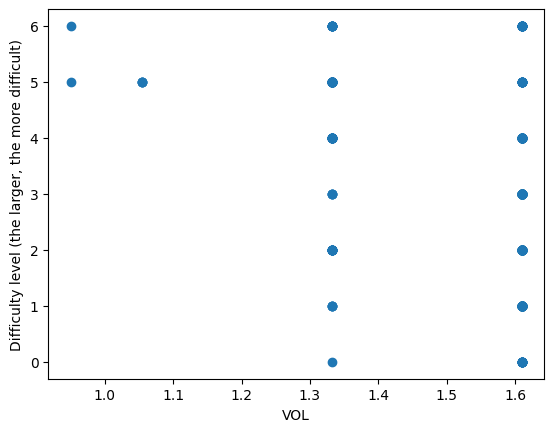

In [131]:
plt.scatter(df["ROC"], df["difficulty"])
plt.ylabel("Difficulty level (the larger, the more difficult)")
plt.xlabel("VOL")
plt.show()

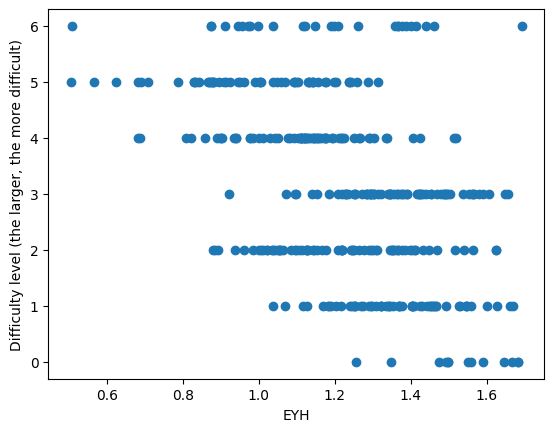

In [132]:
plt.scatter(df["EYH"], df["difficulty"])
plt.ylabel("Difficulty level (the larger, the more difficult)")
plt.xlabel("EYH")
plt.show()

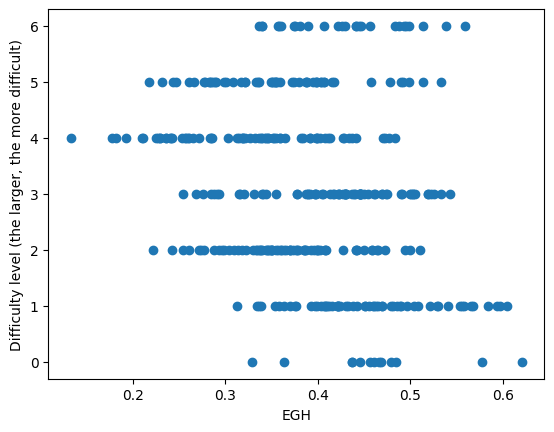

In [133]:
plt.scatter(df["EGH"], df["difficulty"])
plt.ylabel("Difficulty level (the larger, the more difficult)")
plt.xlabel("EGH")
plt.show()